In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
email_template_groups = pd.read_csv("/content/email_template_groups.csv")
email_info = pd.read_csv("/content/email_info.csv")
emails = pd.read_csv("/content/emails.csv")

In [ ]:
def combine_dfs(email, email_info, email_templates):
  email_info_groups = email_info.merge(email_template_groups, on = 'email_template_id')
  emails_merged = email.merge(email_info_groups, on = 'email_id')
  return emails_merged

In [ ]:
merged_emails_df = combine_dfs(emails, email_info, email_template_groups)
merged_emails_df

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False,T0159,BLITCJF48T,Educational
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaN,NaN,False,False,T0157,1IE0CLHEJJ,Engagement
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaN,NaN,False,False,T0159,S0RNNDCE72,Educational
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaN,NaN,False,False,T0159,4CLWFGQ19K,Educational
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False,T0155,NaN,Educational
...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaN,NaN,False,False,T0084,YEOCNGQ2GA,Educational
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaN,NaN,False,False,T0084,NaN,Educational
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaN,True,False,T0084,YD5PE8C783,Educational


#Exploratory Data Analysis (EDA)
The main goal of this part of this notebook, it is to understand the data we have.

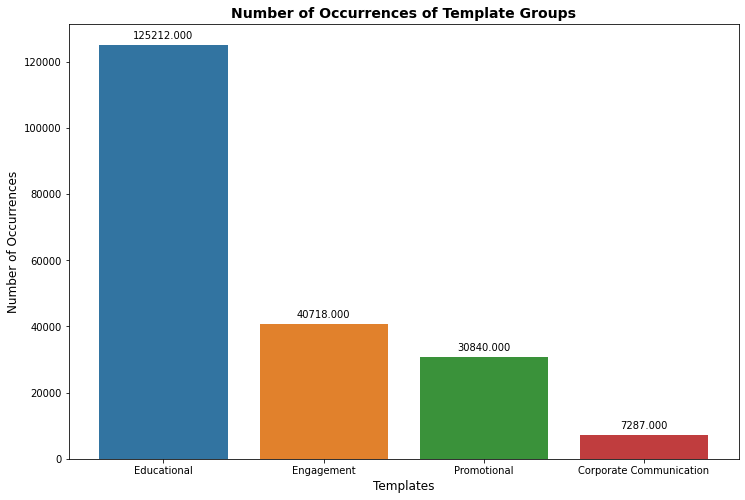

In [ ]:
def create_countplot(df, column_name, title = None, xlabel = None, ylabel = None,):
  fig, ax = plt.subplots()
  ax = sns.countplot(x = column_name, data = df, order = df[column_name].value_counts().index, ax = ax)
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
  ax.set_title(title, fontSize = 14, fontWeight = 'bold')
  ax.set_xlabel(xlabel, fontSize = 12)
  ax.set_ylabel(ylabel, fontSize = 12)
  plt.plot()

create_countplot(merged_emails_df,'email_template_group', title = 'Number of Occurrences of Template Groups', xlabel = 'Templates', ylabel = 'Number of Occurrences')

Podemos visualizar na figura acima, que temos o maior número de ocorrências de templates de cunho Educacional com mais de 120k, em seguida de Engajamento em torno de 40k, temas de Corporate Communication é o tema que fia com menor número de templates.

Com base nas categorias acima, vamos tentar entender quais tiveram o maior 

*   Item da lista
*   Item da lista

percentual de emails abertos.
O email aberto já é um fator positivo, pois, indica que o usuário acabou tendo um certo interesse no tema que foi abordado no mesmo.

In [ ]:
merged_emails_df[merged_emails_df['email_template_group'] == 'Educational']['open'].value_counts()

True     63468
False    61744
Name: open, dtype: int64

In [ ]:
def get_column_percentage(df, column_to_group, column_target) -> pd.DataFrame():
  columns_values_unique = df[column_to_group].unique()
  result_df = pd.DataFrame(columns = [column_to_group, 'open_percentage', "didnt_open_percentage"], index = range(len(columns_values_unique)))
  for idx,col in enumerate(columns_values_unique):
    df_groups =  df[df[column_to_group] == col][column_target].value_counts(normalize = True)
    true_values = df_groups[True]
    false_values = df_groups[False]
    result_df.loc[idx][column_to_group] = col 
    result_df.loc[idx]['open_percentage'] = true_values 
    result_df.loc[idx]['didnt_open_percentage'] = false_values
  return result_df
template_open_emails = get_column_percentage(merged_emails_df, 'email_template_group','open')

In [ ]:
template_open_emails = get_column_percentage(merged_emails_df, 'email_template_group','open')
template_open_emails

,email_template_group,open_percentage,didnt_open_percentage
0,Educational,0.506884,0.493116
1,Engagement,0.503315,0.496685
2,Corporate Communication,0.549609,0.450391
3,Promotional,0.468969,0.531031


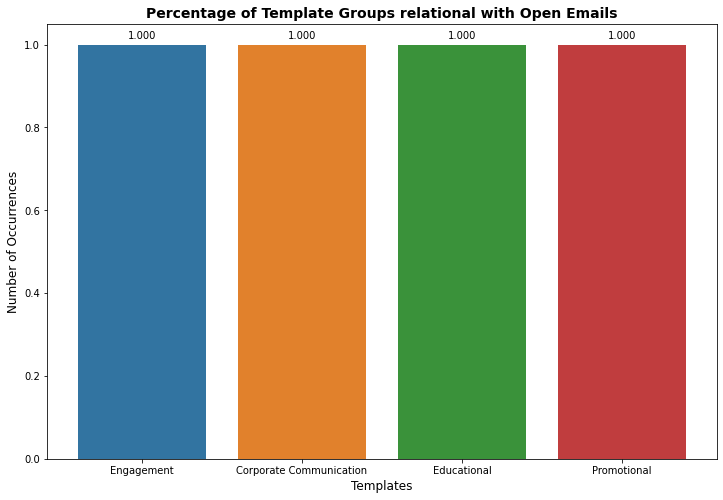

In [ ]:
template_open_emails = get_column_percentage(merged_emails_df, 'email_template_group','open')
create_countplot(template_open_emails,'email_template_group', title = 'Percentage of Template Groups relational with Open Emails', xlabel = 'Templates', ylabel = 'Number of Occurrences')

In [ ]:
def create_percentages_df(df, column_to_group, column_target ):
  df_size = df.groupby([column_target, column_to_group]).size().reset_index(name = 'count')
  df_total = df_size.groupby(column_to_group).sum().reset_index()
  df_merged = df_size.merge(df_total, on = column_to_group)
  df_merged['percentage'] = round(df_merged['count_x'] / df_merged['count_y'],3)
  df_merged = df_merged.rename({column_target + "_x": column_target},axis = 1)
  df_merged = df_merged[[column_to_group,column_target,'percentage']]
  return df_merged

email_template_percentage_df = create_percentages_df(merged_emails_df, 'email_template_group','open')


In [ ]:
email_template_percentage_df

,email_template_group,open,percentage
0,Corporate Communication,False,0.450
1,Corporate Communication,True,0.550
2,Educational,False,0.493
3,Educational,True,0.507
4,Engagement,False,0.497
5,Engagement,True,0.503
6,Promotional,False,0.531
7,Promotional,True,0.469


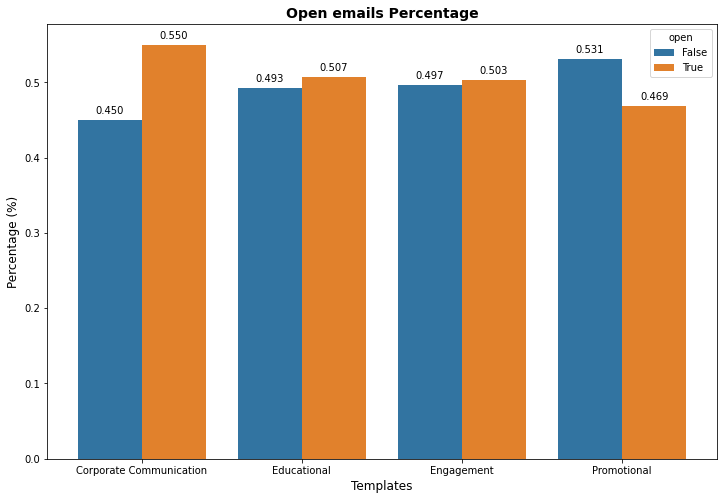

In [ ]:
def create_barplot(df, x, y, hue = None,title = None, xlabel = None, ylabel = None):
  fig, ax = plt.subplots()
  ax = sns.barplot(x = x, y = y, hue = hue,data = df)
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
  ax.set_title(title, fontSize = 14, fontWeight = 'bold')
  ax.set_xlabel(xlabel, fontSize = 12)
  ax.set_ylabel(ylabel, fontSize = 12)
  plt.plot()

create_barplot(email_template_percentage_df,x = 'email_template_group',y = 'percentage', hue = 'open', title = 'Open emails Percentage',xlabel = 'Templates', ylabel = 'Percentage (%)')

Podemos visualizar que emaisl de cunho promocional, é o que possui a maior taxa de rejeição, vulgo, usuários não abrem tais emails.

No entanto, emails na quais são de comunicação corporativa são os templates que mais possuem taxa de abertura em comparação com o emails que não abertos, chega a 10% de diferença.

Agora, que sabemos que emails de comunicação corporativa, são os que possuem uma maior incidência de serem abertos, em seguida de cunho Educacional, vamos ver quais são os que possuem um maior taxa que foram clicados.
Isso define, se o tema do email, foi de fato relevante!

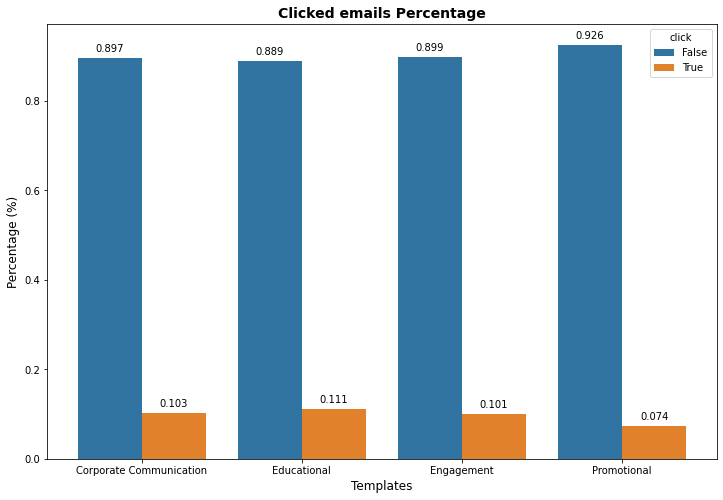

In [ ]:
template_clicked_emails = create_percentages_df(merged_emails_df, 'email_template_group','click')
create_barplot(template_clicked_emails,x = 'email_template_group',y = 'percentage', hue = 'click', title = 'Clicked emails Percentage',xlabel = 'Templates', ylabel = 'Percentage (%)')

Quando analisamos o percentual de pessoas quem clicam nos emails, percebemos q o template que gera maior retorno é o de cunho Educacional, enquanto templates Promocionais, são o que possuem a pior taxa de retorno em clicks.

Agora que sabemos quais são os templates que tiveram mais sucesso, vamos tentar verificar se existe alguma tendência, por exemplo, será que emails enviandos na segunda feira tendem a ser mais abertos que na sexta-feira?

In [ ]:
from datetime import datetime

0         Wednesday
1          Thursday
2          Thursday
3          Thursday
4           Tuesday
            ...    
204052     Thursday
204053     Thursday
204054     Thursday
204055     Thursday
204056      Tuesday
Name: date, Length: 204057, dtype: object

In [ ]:
merged_emails_df['last_open'] = pd.to_datetime(merged_emails_df['last_open'])
merged_emails_df['date'] = pd.to_datetime(merged_emails_df['date'] )

In [ ]:
merged_emails_df['last_open_day_name'] = merged_emails_df['last_open'].dt.day_name()
merged_emails_df

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False,T0159,BLITCJF48T,Educational,Wednesday
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaN,False,False,T0157,1IE0CLHEJJ,Engagement,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaN,False,False,T0159,S0RNNDCE72,Educational,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaN,False,False,T0159,4CLWFGQ19K,Educational,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False,T0155,NaN,Educational,Friday
...,...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaT,NaN,False,False,T0084,YEOCNGQ2GA,Educational,NaN
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational,Thursday
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaT,NaN,False,False,T0084,NaN,Educational,NaN
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaN,True,False,T0084,YD5PE8C783,Educational,Saturday


In [ ]:
merged_emails_df['date']

0        2021-08-11 07:50:00
1        2021-07-01 06:07:00
2        2021-10-07 07:45:00
3        2021-09-23 12:26:00
4        2021-07-27 14:47:00
                 ...        
204052   2020-07-23 10:54:00
204053   2020-07-23 10:51:00
204054   2020-07-23 11:36:00
204055   2020-07-23 11:13:00
204056   2020-06-09 11:56:00
Name: date, Length: 204057, dtype: datetime64[ns]

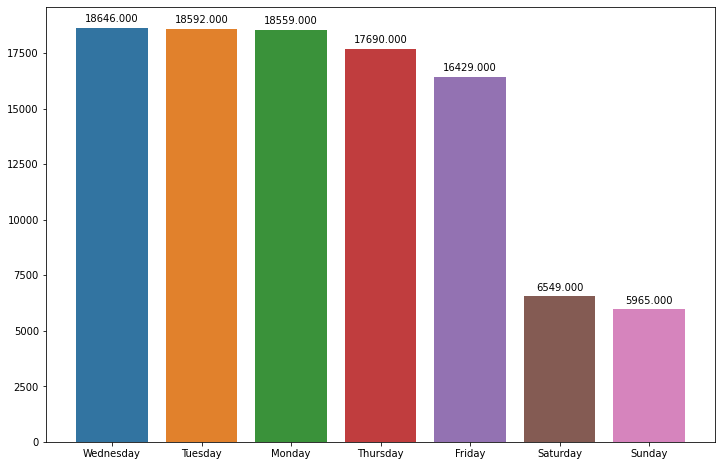

In [ ]:
create_countplot(merged_emails_df,'last_open_day_name')

Podemos verificar, que emails enviandos na Quarta-Feira, são os que possuem uma maior taxa de serem abertos, um fato interessante, é que os três primeiros dias da semana, são os dias que possuem maior taxa de abertura de emails, enquanto os ultimos dois dias (Quinta e Sexta-Feira) temos uma taxa bem menor.

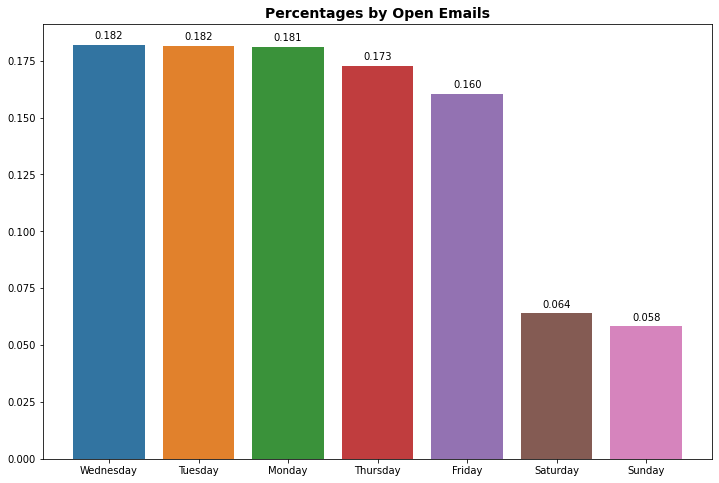

In [ ]:
open_day_percetanges = merged_emails_df['last_open_day_name'].value_counts(normalize = True).reset_index()
create_barplot(open_day_percetanges,'index','last_open_day_name',title = 'Percentages by Open Emails')

In [ ]:
merged_emails_df[merged_emails_df['customer_id'] == 'xx1UxxxxxxswRWsNFR']

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day
13526,XJ-222999705,xx1UxxxxxxswRWsNFR,2021-10-18 09:46:00,2021-10-23 09:06:00,NaN,True,False,T0162,D14CEEUS4J,Engagement,Saturday,Morning
19634,XJ-222953447,xx1UxxxxxxswRWsNFR,2021-07-21 10:58:00,2021-08-02 15:07:00,NaN,True,False,T0152,2PBVLOF9P9,Promotional,Monday,Noon
23549,XJ-222907044,xx1UxxxxxxswRWsNFR,2021-10-22 10:48:00,2021-10-23 08:05:00,NaN,True,False,T0163,EEHQTDZHD3,Engagement,Saturday,Early Morning
64428,XJ-222824929,xx1UxxxxxxswRWsNFR,2021-04-12 10:08:00,2021-04-15 18:33:00,2021-04-15 18:33:00,True,True,T0140,U6F2URAU7J,Promotional,Thursday,Evening
75079,XJ-222776428,xx1UxxxxxxswRWsNFR,2021-02-26 10:43:00,2021-02-26 14:09:00,NaN,True,False,T0131,PZMKZQYEJ1,Educational,Friday,Noon
91385,XJ-222733525,xx1UxxxxxxswRWsNFR,2021-02-04 11:27:00,NaT,NaN,False,False,T0126,I9AV2T9CR0,Educational,NaN,NaN
115120,XJ-222633767,xx1UxxxxxxswRWsNFR,2020-11-12 11:35:00,2020-11-13 09:18:00,2020-11-12 12:14:00,True,True,T0117,NP08HTOY49,Educational,Friday,Morning
124567,XJ-222686795,xx1UxxxxxxswRWsNFR,2020-12-10 12:42:00,2020-12-17 08:39:00,NaN,True,False,T0119,2ZCNSK1PU6,Educational,Thursday,Early Morning
129324,XJ-222577553,xx1UxxxxxxswRWsNFR,2020-10-13 09:44:00,NaT,NaN,False,False,T0071,NaN,Educational,NaN,NaN
149118,XJ-222517248,xx1UxxxxxxswRWsNFR,2020-10-28 15:39:00,2020-10-29 17:13:00,NaN,True,False,T0086,0S3CWYHHT8,Educational,Thursday,Evening


In [ ]:
merged_emails_df


,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False,T0159,BLITCJF48T,Educational,Wednesday,Night
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaN,False,False,T0157,1IE0CLHEJJ,Engagement,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaN,False,False,T0159,S0RNNDCE72,Educational,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaN,False,False,T0159,4CLWFGQ19K,Educational,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False,T0155,NaN,Educational,Friday,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaT,NaN,False,False,T0084,YEOCNGQ2GA,Educational,NaN,NaN
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational,Thursday,Noon
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaT,NaN,False,False,T0084,NaN,Educational,NaN,NaN
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaN,True,False,T0084,YD5PE8C783,Educational,Saturday,Morning


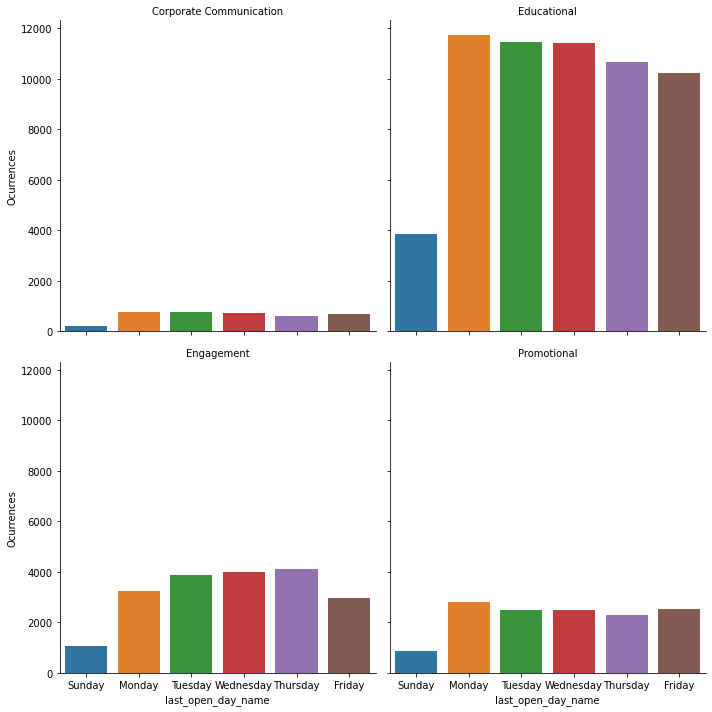

In [ ]:
def create_countplot_col_wrap(df, x, y, column_to_wrap, title = None, order = None, xlabel = None, ylabel = None):
  g = sns.catplot(x = x, y =y,col = column_to_wrap, kind = 'bar',col_wrap=2,data = df, order = order)
  g.fig.suptitle(title,y=1.03)
  g.set_titles("{col_name}")
  plt.show()

create_countplot_col_wrap(x, x= 'last_open_day_name', y = 'Ocurrences', column_to_wrap =  'email_template_group', order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

In [ ]:
x = merged_emails_df.groupby(['email_template_group','last_open_day_name']).size().reset_index(name = 'Ocurrences')
x

,email_template_group,last_open_day_name,Ocurrences
0,Corporate Communication,Friday,680
1,Corporate Communication,Monday,774
2,Corporate Communication,Saturday,244
3,Corporate Communication,Sunday,197
4,Corporate Communication,Thursday,610
5,Corporate Communication,Tuesday,765
6,Corporate Communication,Wednesday,735
7,Educational,Friday,10249
8,Educational,Monday,11727
9,Educational,Saturday,4108


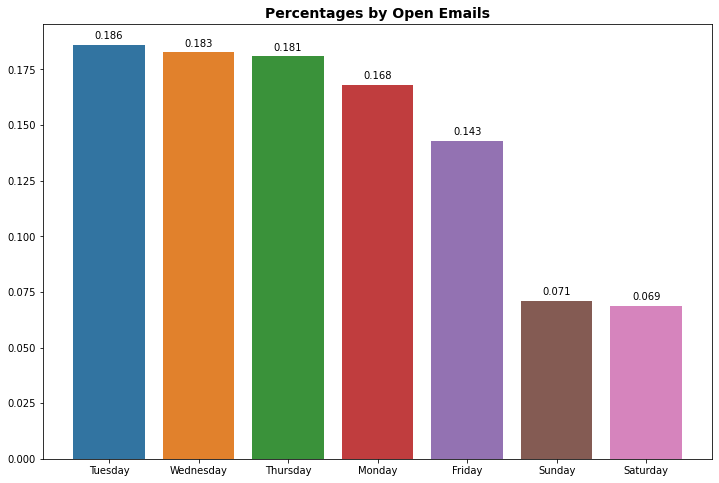

In [ ]:
dummy_df = merged_emails_df[['click','last_open_day_name']]
a = dummy_df[dummy_df['click'] == True].value_counts(normalize = True).reset_index()
create_barplot(a,'last_open_day_name',0,title = 'Percentages by Open Emails')

In [ ]:
merged_emails_df

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False,T0159,BLITCJF48T,Educational,Wednesday,Night
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaN,False,False,T0157,1IE0CLHEJJ,Engagement,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaN,False,False,T0159,S0RNNDCE72,Educational,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaN,False,False,T0159,4CLWFGQ19K,Educational,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False,T0155,NaN,Educational,Friday,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaT,NaN,False,False,T0084,YEOCNGQ2GA,Educational,NaN,NaN
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational,Thursday,Noon
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaT,NaN,False,False,T0084,NaN,Educational,NaN,NaN
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaN,True,False,T0084,YD5PE8C783,Educational,Saturday,Morning


In [ ]:
import numpy as np 
def get_hour_period(hour):
  result = None
  if np.isnan(hour):
    result = np.nan
  else:
    if (hour > 4) and (hour <= 8):
        result = 'Early Morning'
    elif (hour > 8) and (hour <= 12 ):
        result =  'Morning'
    elif (hour > 12) and (hour <= 16):
        result = 'Noon'
    elif (hour > 16) and (hour <= 20) :
        result =  'Evening'
    elif (hour > 20) and (hour <= 24):
        result = 'Night'
    elif (hour <= 4):
        result = 'Late Night'
  return result 

merged_emails_df['last_open_email_period_day'] = merged_emails_df['last_open'].dt.hour.apply(get_hour_period) 
merged_emails_df['click_email_period_day'] = merged_emails_df['last_click'].dt.hour.apply(get_hour_period) 

Os periodos são definidos da seguinte forma:
* Early Morning: Hora entre 4 as 8 da manhã
* Morning: 8 às 12
* Noon: 12 às 16 
* Evening: 16 às 20
* Night: 20 às 24
* Late night: 0 às 4

In [ ]:
merged_emails_df['last_click'] = pd.to_datetime(merged_emails_df['last_click'])

In [ ]:
 merged_emails_df['last_click']

0                         NaN
1                         NaN
2                         NaN
3                         NaN
4                         NaN
                 ...         
204052                    NaN
204053    2020-07-23 13:50:00
204054                    NaN
204055                    NaN
204056                    NaN
Name: last_click, Length: 204057, dtype: object

In [ ]:
merged_emails_df['last_open_email_period_day'].value_counts()


Noon             26772
Evening          26510
Morning          25158
Early Morning    11841
Night             9915
Late Night        2234
Name: last_open_email_period_day, dtype: int64

In [ ]:
t = merged_emails_df.groupby(["email_template_group",'last_open_email_period_day']).size().reset_index(name = 'Ocurrences')
t

,email_template_group,last_open_email_period_day,Ocurrences
0,Corporate Communication,Early Morning,411
1,Corporate Communication,Evening,1012
2,Corporate Communication,Late Night,76
3,Corporate Communication,Morning,1061
4,Corporate Communication,Night,366
5,Corporate Communication,Noon,1079
6,Educational,Early Morning,7183
7,Educational,Evening,16438
8,Educational,Late Night,1451
9,Educational,Morning,15639


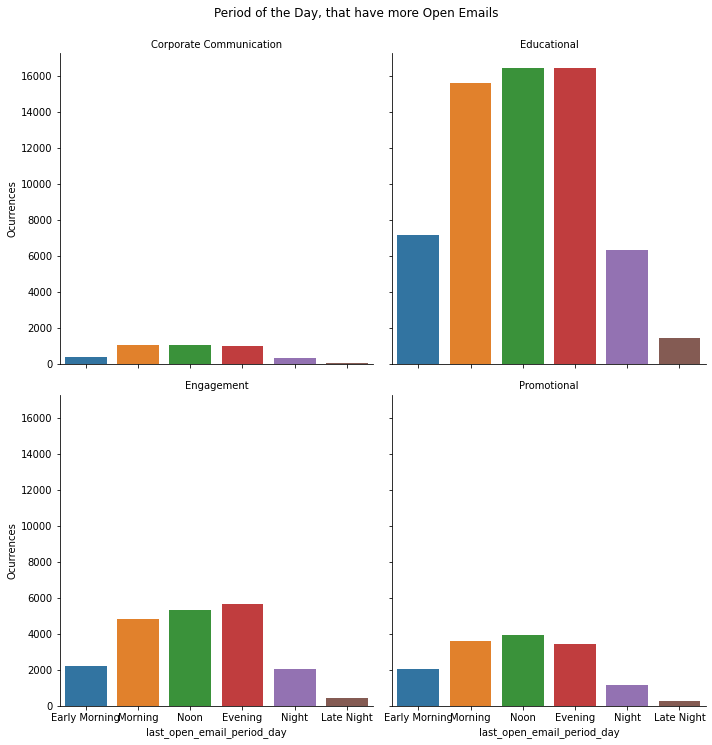

In [ ]:
g = sns.catplot(x = 'last_open_email_period_day', y = 'Ocurrences',col = 'email_template_group', kind = 'bar',col_wrap=2,data = t, order = ['Early Morning',
                                                                                                                                    'Morning','Noon','Evening','Night','Late Night'])
g.fig.suptitle("Period of the Day, that have more Open Emails",y=1.03)
g.set_titles("{col_name}")
plt.show()

Como podemos visualizar, que emails que foram enviados durante o período da Moon e Evening, possuem uma maior taxa de serem abertos pelos os usuários.


In [ ]:
merged_emails_df

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day,click_email_period_day
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaT,True,False,T0159,BLITCJF48T,Educational,Wednesday,Night,NaN
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaT,False,False,T0157,1IE0CLHEJJ,Engagement,NaN,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaT,False,False,T0159,S0RNNDCE72,Educational,NaN,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaT,False,False,T0159,4CLWFGQ19K,Educational,NaN,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaT,True,False,T0155,NaN,Educational,Friday,Early Morning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaT,NaT,False,False,T0084,YEOCNGQ2GA,Educational,NaN,NaN,NaN
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational,Thursday,Noon,Noon
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaT,NaT,False,False,T0084,NaN,Educational,NaN,NaN,NaN
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaT,True,False,T0084,YD5PE8C783,Educational,Saturday,Morning,NaN


In [ ]:
click_emails_periods

,email_template_group,click_email_period_day,Ocurrences
0,Corporate Communication,Early Morning,71
1,Corporate Communication,Evening,226
2,Corporate Communication,Late Night,12
3,Corporate Communication,Morning,167
4,Corporate Communication,Night,62
5,Corporate Communication,Noon,213
6,Educational,Early Morning,1439
7,Educational,Evening,3952
8,Educational,Late Night,328
9,Educational,Morning,3502


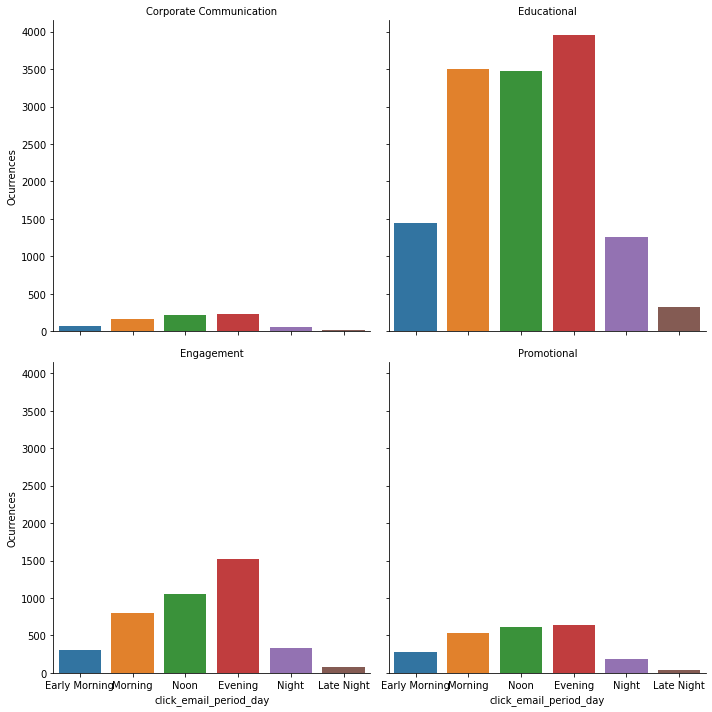

In [ ]:
click_emails_periods = merged_emails_df[merged_emails_df['click']==True].groupby(['email_template_group','click_email_period_day']).size().reset_index(name = 'Ocurrences')
create_countplot_col_wrap(click_emails_periods, x= 'click_email_period_day', y = 'Ocurrences', column_to_wrap =  'email_template_group', order =['Early Morning',
                                                                                                                                    'Morning','Noon','Evening','Night','Late Night'])

Agora, qi

In [ ]:
emails_clicked = merged_emails_df[merged_emails_df['click'] == True]
emails_clicked

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day,click_email_period_day
7,XJ-222990905,xx1UxxxxxxswPcUNFU,2021-10-18 15:36:00,2021-10-18 15:49:00,2021-10-18 15:51:00,True,True,T0158,XV42U37ID7,Educational,Monday,Noon,Noon
40,XJ-222956903,xx1UxxxxxxswQmYNFU,2021-07-27 14:47:00,2021-07-28 17:50:00,2021-07-28 17:49:00,True,True,T0155,2IRB0ZZAOC,Educational,Wednesday,Evening,Evening
49,XJ-222932837,xx1UxxxxxxswSXVNF2,2021-07-01 06:02:00,2021-08-17 15:22:00,2021-08-17 15:22:00,True,True,T0157,1YW8DK5KRU,Engagement,Tuesday,Noon,Noon
50,XJ-222980435,xx1UxxxxxxswIVqNFR,2021-10-07 07:42:00,2021-10-10 14:31:00,2021-10-15 17:55:00,True,True,T0159,23OEHP0S90,Educational,Sunday,Noon,Evening
59,XJ-222990908,xx1UxxxxxxswKxpNFJ,2021-10-18 15:36:00,2021-10-18 15:59:00,2021-10-18 15:58:00,True,True,T0158,ZTF125EIS5,Educational,Monday,Noon,Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204034,XJ-222374684,xx1UxxxxxxswUoTNFU,2020-05-22 16:15:00,2020-06-30 19:14:00,2020-06-30 19:14:00,True,True,T0038,5XXM8S3SPP,Engagement,Tuesday,Evening,Evening
204041,XJ-222391260,xx1UxxxxxxswNLMNF2,2020-06-09 18:20:00,2020-08-30 22:23:00,2020-06-21 20:24:00,True,True,T0065,9OBTKEQQQK,Educational,Sunday,Night,Evening
204046,XJ-222391225,xx1UxxxxxxswPqcNFJ,2020-06-09 18:03:00,2020-06-12 16:15:00,2020-06-12 18:47:00,True,True,T0065,SHDZXB0SQV,Educational,Friday,Noon,Evening
204051,XJ-222482897,xx1UxxxxxxswNLMNF2,2020-07-23 10:46:00,2020-08-30 22:22:00,2020-08-30 22:22:00,True,True,T0084,3QNJQZQEO6,Educational,Sunday,Night,Night


In [ ]:
from datetime import datetime
merged_emails_df['date'].dt.day_name()

0         Wednesday
1          Thursday
2          Thursday
3          Thursday
4           Tuesday
            ...    
204052     Thursday
204053     Thursday
204054     Thursday
204055     Thursday
204056      Tuesday
Name: date, Length: 204057, dtype: object

In [ ]:
merged_emails_df[merged_emails_df['click'] == True]['date'].dt.day_name()

7           Monday
40         Tuesday
49        Thursday
50        Thursday
59          Monday
            ...   
204034      Friday
204041     Tuesday
204046     Tuesday
204051    Thursday
204053    Thursday
Name: date, Length: 21091, dtype: object

In [ ]:
merged_emails_df.groupby(["email_template_group","last_open_day_name",""])

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day,click_email_period_day
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaT,True,False,T0159,BLITCJF48T,Educational,Wednesday,Night,NaN
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaT,False,False,T0157,1IE0CLHEJJ,Engagement,NaN,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaT,False,False,T0159,S0RNNDCE72,Educational,NaN,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaT,False,False,T0159,4CLWFGQ19K,Educational,NaN,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaT,True,False,T0155,NaN,Educational,Friday,Early Morning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaT,NaT,False,False,T0084,YEOCNGQ2GA,Educational,NaN,NaN,NaN
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational,Thursday,Noon,Noon
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaT,NaT,False,False,T0084,NaN,Educational,NaN,NaN,NaN
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaT,True,False,T0084,YD5PE8C783,Educational,Saturday,Morning,NaN


In [ ]:
merged_emails_df[merged_emails_df['click'] == True].groupby("email_template_id").sum()

,open,click
email_template_id,,
T0004,10,10
T0005,9,9
T0006,67,67
T0007,2,2
T0010,144,144
...,...,...
T0159,455,455
T0160,55,55
T0161,152,152


In [ ]:
abs(merged_emails_df['date'] - merged_emails_df['last_open']).dt.days

0         0.0
1         NaN
2         NaN
3         NaN
4         9.0
         ... 
204052    NaN
204053    0.0
204054    NaN
204055    2.0
204056    NaN
Length: 204057, dtype: float64

In [ ]:
merged_emails_df

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group,last_open_day_name,last_open_email_period_day,click_email_period_day
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaT,True,False,T0159,BLITCJF48T,Educational,Wednesday,Night,NaN
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaT,False,False,T0157,1IE0CLHEJJ,Engagement,NaN,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaT,False,False,T0159,S0RNNDCE72,Educational,NaN,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaT,False,False,T0159,4CLWFGQ19K,Educational,NaN,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaT,True,False,T0155,NaN,Educational,Friday,Early Morning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,NaT,NaT,False,False,T0084,YEOCNGQ2GA,Educational,NaN,NaN,NaN
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,T0084,H6I3LP98NZ,Educational,Thursday,Noon,Noon
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,NaT,NaT,False,False,T0084,NaN,Educational,NaN,NaN,NaN
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,2020-07-25 11:50:00,NaT,True,False,T0084,YD5PE8C783,Educational,Saturday,Morning,NaN


In [ ]:
df_teste = merged_emails_df[['customer_id','date','open','click','email_template_id','email_template_group']]
df_teste

,customer_id,date,open,click,email_template_id,email_template_group
0,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,True,False,T0159,Educational
1,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,False,False,T0157,Engagement
2,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,False,False,T0159,Educational
3,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,False,False,T0159,Educational
4,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,True,False,T0155,Educational
...,...,...,...,...,...,...
204052,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,False,False,T0084,Educational
204053,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,True,True,T0084,Educational
204054,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,False,False,T0084,Educational
204055,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,True,False,T0084,Educational


In [ ]:
 pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619427 sha256=e2cd796af11d4f59120a9b0887809bc8680cc91b2a96d6d8feba317437138a8f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
len(df_teste['customer_id'].unique()), len(df_teste['email_template_id'])

(21166, 204057)

In [ ]:
df_teste

,customer_id,date,open,click,email_template_id,email_template_group
0,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,True,False,T0159,Educational
1,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,False,False,T0157,Engagement
2,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,False,False,T0159,Educational
3,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,False,False,T0159,Educational
4,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,True,False,T0155,Educational
...,...,...,...,...,...,...
204052,xx1UxxxxxxswUioNFJ,2020-07-23 10:54:00,False,False,T0084,Educational
204053,xx1UxxxxxxswYFQNF2,2020-07-23 10:51:00,True,True,T0084,Educational
204054,xx1UxxxxxxswRWsNFR,2020-07-23 11:36:00,False,False,T0084,Educational
204055,xx1UxxxxxxswVPwNFR,2020-07-23 11:13:00,True,False,T0084,Educational


In [ ]:
booleanDictionary = {True: 'true', False: 'false'}
df_teste['open'] = df_teste['open'].replace(booleanDictionary)
df_teste['click'] = df_teste['click'].replace(booleanDictionary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_teste['open'] = df_teste['open'].map(
    lambda x: 1.0*(x == 'true'))
df_teste['click'] = df_teste['click'].map(
    lambda x: 1.0*(x == 'true'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
a = df_teste.groupby(['email_template_id', 'customer_id','click',]).size().reset_index().pivot(columns=['email_template_id','click'], index='customer_id', values=0)
a

email_template_id  T0001 T0002 T0003 T0004      ... T0162     T0163      T0164
click                0.0   0.0   0.0   1.0 0.0  ...   0.0 1.0   1.0  0.0   0.0
customer_id                                     ...                           
xx11Uxxxx21gotoVFF   NaN   NaN   NaN   NaN NaN  ...   1.0 NaN   1.0  NaN   NaN
xx11Uxxxx21gotrVFF   NaN   NaN   NaN   NaN NaN  ...   1.0 NaN   NaN  NaN   NaN
xx11Uxxxx21gou3VFF   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  1.0   NaN
xx11Uxxxx21gpOYVFY   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  NaN   NaN
xx11Uxxxx21gpOZVFY   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  NaN   NaN
...                  ...   ...   ...   ...  ..  ...   ...  ..   ...  ...   ...
xx1xGxxxx2xrNuzVFJ   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  NaN   NaN
xx1xGxxxx2xrTJhVFR   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  1.0   NaN
xx1xGxxxx2xrTK1VFR   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  NaN   NaN
xx1xGxxxx2xrTK9VFR   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  NaN   NaN
xx1xGxxxx2xrXyHVFU   NaN   NaN   NaN   NaN NaN  ...   NaN NaN   NaN  NaN   NaN

[21166 rows x 268 columns]

In [ ]:
import random

"""
interactions_selected = interactions_selected[interactions_selected['user_id'].isin(random.sample(list(interactions_selected['user_id'].unique()), 
                                                                                                  k=5000))]

interactions_selected.sample(10)
"""
df = df_teste.loc[df_teste['click']==1, ['email_template_id', 'customer_id','click','open']]
df_selected = df[df['click'].isin(random.sample(list(df['customer_id'].unique()), k = 5000))]
df_selected

,email_template_id,customer_id,click,open


In [ ]:
df_selected = df[df['customer_id'].isin(random.sample(list(df['customer_id'].unique()), k=5000))]
df_selected

,email_template_id,customer_id,click,open
59,T0158,xx1UxxxxxxswKxpNFJ,1.0,1.0
83,T0158,xx1Uxxxxx1cJOxRNFW,1.0,1.0
101,T0159,xx11Uxxxx21hxZcVFN,1.0,1.0
102,T0155,xx1UxxxxxxswXGvNFR,1.0,1.0
118,T0155,xx1xGxxxx22p3oqVFF,1.0,1.0
...,...,...,...,...
203994,T0084,xx1UxxxxxxswexSNFV,1.0,1.0
204007,T0065,xx1UxxxxxxswKdiNFJ,1.0,1.0
204012,T0084,xx1UxxxxxxswUFVNF2,1.0,1.0
204034,T0038,xx1UxxxxxxswUoTNFU,1.0,1.0


In [ ]:
# dummify categorical features
df_transformed = pd.get_dummies(df_selected, columns = ['email_template_id', 'click', ])
df_transformed = df_transformed.sort_values('customer_id').reset_index().drop('index', axis=1)
df_transformed.head(5)

,customer_id,open,email_template_id_T0004,email_template_id_T0005,email_template_id_T0006,email_template_id_T0007,email_template_id_T0010,email_template_id_T0011,email_template_id_T0012,email_template_id_T0013,email_template_id_T0014,email_template_id_T0015,email_template_id_T0016,email_template_id_T0017,email_template_id_T0018,email_template_id_T0019,email_template_id_T0020,email_template_id_T0021,email_template_id_T0022,email_template_id_T0023,email_template_id_T0024,email_template_id_T0025,email_template_id_T0026,email_template_id_T0027,email_template_id_T0028,email_template_id_T0029,email_template_id_T0030,email_template_id_T0032,email_template_id_T0033,email_template_id_T0034,email_template_id_T0037,email_template_id_T0038,email_template_id_T0039,email_template_id_T0040,email_template_id_T0041,email_template_id_T0042,email_template_id_T0043,email_template_id_T0044,email_template_id_T0045,email_template_id_T0047,...,email_template_id_T0119,email_template_id_T0120,email_template_id_T0121,email_template_id_T0122,email_template_id_T0123,email_template_id_T0125,email_template_id_T0126,email_template_id_T0127,email_template_id_T0128,email_template_id_T0129,email_template_id_T0130,email_template_id_T0131,email_template_id_T0133,email_template_id_T0134,email_template_id_T0136,email_template_id_T0137,email_template_id_T0138,email_template_id_T0139,email_template_id_T0140,email_template_id_T0141,email_template_id_T0142,email_template_id_T0143,email_template_id_T0144,email_template_id_T0145,email_template_id_T0146,email_template_id_T0147,email_template_id_T0148,email_template_id_T0150,email_template_id_T0152,email_template_id_T0154,email_template_id_T0155,email_template_id_T0156,email_template_id_T0157,email_template_id_T0158,email_template_id_T0159,email_template_id_T0160,email_template_id_T0161,email_template_id_T0162,email_template_id_T0163,click_1.0
0,xx11Uxxxx21gy5VVFV,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,xx11Uxxxx21hx2gVFF,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,xx11Uxxxx21hxZcVFN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,xx11Uxxxx21hxZcVFN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,xx11Uxxxx21hxZcVFN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# convert to csr matrix
from scipy.sparse import csr_matrix

df_transformed_csr = csr_matrix(df_transformed.drop('customer_id', axis=1).values)
df_transformed_csr

<12633x127 sparse matrix of type '<class 'numpy.float64'>'
	with 37899 stored elements in Compressed Sparse Row format>

In [ ]:
df_selected_interaction = pd.pivot_table(df_selected, index='customer_id', columns='email_template_id', values='click')

# fill missing values with 0
df_selected_interaction =df_selected_interaction.fillna(0)

df_selected_interaction.head(10)

email_template_id,T0004,T0005,T0006,T0007,T0010,T0011,T0012,T0013,T0014,T0015,T0016,T0017,T0018,T0019,T0020,T0021,T0022,T0023,T0024,T0025,T0026,T0027,T0028,T0029,T0030,T0032,T0033,T0034,T0037,T0038,T0039,T0040,T0041,T0042,T0043,T0044,T0045,T0047,T0048,T0049,...,T0118,T0119,T0120,T0121,T0122,T0123,T0125,T0126,T0127,T0128,T0129,T0130,T0131,T0133,T0134,T0136,T0137,T0138,T0139,T0140,T0141,T0142,T0143,T0144,T0145,T0146,T0147,T0148,T0150,T0152,T0154,T0155,T0156,T0157,T0158,T0159,T0160,T0161,T0162,T0163
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
xx11Uxxxx21gy5VVFV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx21hx2gVFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx21hxZcVFN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
xx11Uxxxx22O1ynVFH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx22TKZhVFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx22TLVYVF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx22TWr3VFL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx22TWrxVFL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx22TY2IVFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_selected_interaction.values


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
user_id = list(df_selected_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [ ]:
df_selected_interaction_csr = csr_matrix(df_selected_interaction.values)
df_selected_interaction_csr

<5000x125 sparse matrix of type '<class 'numpy.float64'>'
	with 12247 stored elements in Compressed Sparse Row format>

In [ ]:
!pip install lightfm

     |████████████████████████████████| 310 kB 5.1 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705348 sha256=b2582d33003bfd3b5e68e7abe21209fad8c80c2f8600d02f52def503afa7deda
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.2 MB/s 


In [ ]:
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM
from skopt import forest_minimize

In [ ]:
df_selected_interaction_csr.

<5000x125 sparse matrix of type '<class 'numpy.float64'>'
	with 12247 stored elements in Compressed Sparse Row format>

In [ ]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)

model = model.fit(df_selected_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [ ]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), item_features=books_metadata_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1

In [ ]:
df_teste[['email_template_id',	'email_template_group']]

,email_template_id,email_template_group
0,T0159,Educational
1,T0157,Engagement
2,T0159,Educational
3,T0159,Educational
4,T0155,Educational
...,...,...
204052,T0084,Educational
204053,T0084,Educational
204054,T0084,Educational
204055,T0084,Educational


In [ ]:
df_dummy

,index,email_template_id,email_template_group
0,178121,T0001,Corporate Communication
1,183215,T0001,Corporate Communication
2,183220,T0001,Corporate Communication
3,183221,T0001,Corporate Communication
4,163017,T0001,Corporate Communication
...,...,...,...
204052,6640,T0163,Engagement
204053,23577,T0164,Educational
204054,19249,T0164,Educational
204055,5822,T0164,Educational


In [ ]:
item_dict ={}
df_dummy = df_teste[['email_template_id',	'email_template_group']].sort_values('email_template_id').reset_index()

for i in range(df_dummy.shape[0]):
    item_dict[(df_dummy.loc[i,'email_template_id'])] = df_dummy.loc[i,'email_template_group']
item_dict

{'T0001': 'Corporate Communication',
 'T0002': 'Corporate Communication',
 'T0003': 'Corporate Communication',
 'T0004': 'Corporate Communication',
 'T0005': 'Corporate Communication',
 'T0006': 'Corporate Communication',
 'T0007': 'Corporate Communication',
 'T0008': 'Corporate Communication',
 'T0010': 'Engagement',
 'T0011': 'Engagement',
 'T0012': 'Engagement',
 'T0013': 'Engagement',
 'T0014': 'Engagement',
 'T0015': 'Engagement',
 'T0016': 'Engagement',
 'T0017': 'Engagement',
 'T0018': 'Engagement',
 'T0019': 'Engagement',
 'T0020': 'Engagement',
 'T0021': 'Engagement',
 'T0022': 'Engagement',
 'T0023': 'Engagement',
 'T0024': 'Engagement',
 'T0025': 'Engagement',
 'T0026': 'Engagement',
 'T0027': 'Engagement',
 'T0028': 'Engagement',
 'T0029': 'Engagement',
 'T0030': 'Engagement',
 'T0032': 'Engagement',
 'T0033': 'Engagement',
 'T0034': 'Engagement',
 'T0035': 'Engagement',
 'T0036': 'Engagement',
 'T0037': 'Engagement',
 'T0038': 'Engagement',
 'T0039': 'Engagement',
 'T0040'

In [ ]:
len(item_dict)

140

In [ ]:
df_selected_interaction

email_template_id,T0004,T0005,T0006,T0007,T0010,T0011,T0012,T0013,T0014,T0015,T0016,T0017,T0018,T0019,T0020,T0021,T0022,T0023,T0024,T0025,T0026,T0027,T0028,T0029,T0030,T0032,T0033,T0034,T0037,T0038,T0039,T0040,T0041,T0042,T0043,T0044,T0045,T0047,T0048,T0049,...,T0118,T0119,T0120,T0121,T0122,T0123,T0125,T0126,T0127,T0128,T0129,T0130,T0131,T0133,T0134,T0136,T0137,T0138,T0139,T0140,T0141,T0142,T0143,T0144,T0145,T0146,T0147,T0148,T0150,T0152,T0154,T0155,T0156,T0157,T0158,T0159,T0160,T0161,T0162,T0163
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
xx11Uxxxx21gy5VVFV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx21hx2gVFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx21hxZcVFN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
xx11Uxxxx22O1ynVFH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx11Uxxxx22TKZhVFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xx1xGxxxx2xquYXVFY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx1xGxxxx2xqzW4VFN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
xx1xGxxxx2xrNupVFJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_selected_interaction.index

Index(['xx11Uxxxx21gy5VVFV', 'xx11Uxxxx21hx2gVFF', 'xx11Uxxxx21hxZcVFN',
       'xx11Uxxxx22O1ynVFH', 'xx11Uxxxx22TKZhVFT', 'xx11Uxxxx22TLVYVF1',
       'xx11Uxxxx22TWr3VFL', 'xx11Uxxxx22TWrxVFL', 'xx11Uxxxx22TY2IVFW',
       'xx11Uxxxx22TmZsVFP',
       ...
       'xx1xGxxxx2xqglhVFF', 'xx1xGxxxx2xqglpVFF', 'xx1xGxxxx2xqjimVFF',
       'xx1xGxxxx2xqrdNVFV', 'xx1xGxxxx2xquYWVFY', 'xx1xGxxxx2xquYXVFY',
       'xx1xGxxxx2xqzW4VFN', 'xx1xGxxxx2xrNupVFJ', 'xx1xGxxxx2xrNuuVFJ',
       'xx1xGxxxx2xrTK9VFR'],
      dtype='object', name='customer_id', length=5000)